## Исследование надёжности заёмщиков (SQL)

Задача: предварительный анализ данных о клиентах банка для настройки программы кредитного скоринга. Решить задачу с помощью SQL.

### <a id='step1'></a>Шаг 1. Открою файл с данными и изучу общую информацию

In [1]:
import pandas as pd

import sqlite3
import matplotlib.pyplot as plt

data_credit = pd.read_csv('datasets/data.csv')

In [2]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
data_credit.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


**Первоначальные выводы**: Таблица содержит 12 столбцов, и более 20 тыс. строк, достаточное количество для получения довольно достоверных статистических выводов.

2 столбца (*отработанные дни и суммарный доход*) - имеют более 2 тыс. null элементов.

### Шаг 2. Ответы на вопросы<a id='step3'></a>

Создам базу данных и загружу в неё таблицу.

In [113]:
conn = sqlite3.connect('db')
cur = conn.cursor()

In [114]:
data_credit.to_sql('data_credit', con=conn, index=False, if_exists='replace')

In [115]:
# тестовый запрос
query = '''
select * from data_credit limit 10'''

In [116]:
def select(sql):
  return pd.read_sql(sql,conn)

In [117]:
select(query)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,wrong_values,days_category,purpose_category,children_category,work_category,age_category,income_level,have_family
0,1,-8437.673028,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875.639453,покупка жилья,0,меньше 0,1. недвижимость,2. один ребёнок,подчиненные (бизнес),до 45 лет,5. высокий,есть семья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080.014102,приобретение автомобиля,0,меньше 0,2. автомобиль,2. один ребёнок,подчиненные (бизнес),до 45 лет,3. средний,есть семья
2,0,-5623.422610,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885.952297,покупка жилья,0,меньше 0,1. недвижимость,1. нет детей,подчиненные (бизнес),до 45 лет,3. средний,есть семья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628.550329,дополнительное образование,0,меньше 0,4. образование,3. два и более детей,подчиненные (бизнес),до 45 лет,5. высокий,есть семья
4,0,340266.072047,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616.077870,сыграть свадьбу,0,больше 0,3. свадьба,1. нет детей,безработные,пенсионеры,4. выше среднего,есть семья
5,0,-926.185831,27,высшее,0,гражданский брак,1,m,компаньон,0,255763.565419,покупка жилья,0,меньше 0,1. недвижимость,1. нет детей,свой бизнес,до 45 лет,5. высокий,есть семья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,f,компаньон,0,240525.971920,операции с жильем,0,меньше 0,1. недвижимость,1. нет детей,свой бизнес,до 45 лет,5. высокий,есть семья
7,0,-152.779569,50,среднее,1,женат / замужем,0,m,сотрудник,0,135823.934197,образование,0,меньше 0,4. образование,1. нет детей,подчиненные (бизнес),после 45 лет,3. средний,есть семья
8,2,-6929.865299,35,высшее,0,гражданский брак,1,f,сотрудник,0,95856.832424,на проведение свадьбы,0,меньше 0,3. свадьба,3. два и более детей,подчиненные (бизнес),до 45 лет,2. низкий,есть семья
9,0,-2188.756445,41,среднее,1,женат / замужем,0,m,сотрудник,0,144425.938277,покупка жилья для семьи,0,меньше 0,1. недвижимость,1. нет детей,подчиненные (бизнес),до 45 лет,3. средний,есть семья


#### Есть ли зависимость между наличием детей и возвратом кредита в срок?<a id='step3.1'></a>

Сгруппируем таблицу по ранее добавленным категориям детей. Все некорректные значения из столбца удалены, поэтому дополнительных фильтров не нужно.

,children_category,debt_percent,how_many_people
0,1. нет детей,0.075458,14021
1,2. один ребёнок,0.092028,4792
2,3. два и более детей,0.093091,2417


Разница по проценту задолженности между категориями: 1.76%


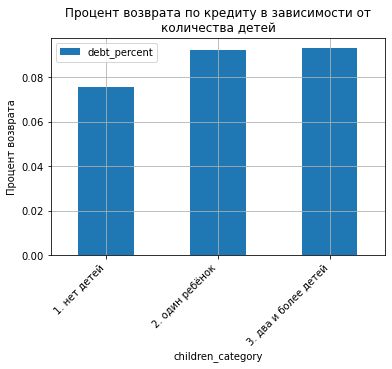

In [118]:
query = """
select children_category, AVG(t.debt) as debt_percent,
COUNT(t.debt) as how_many_people from data_credit t group by children_category"""
t = select(query)
display(t)
print('Разница по проценту задолженности между категориями: {:.2%}'.format(t.debt_percent.max() - t.debt_percent.min()))
t.plot(kind='bar', x='children_category', y='debt_percent', grid=True, rot=45)
plt.title('Процент возврата по кредиту в зависимости от\nколичества детей')
plt.xticks(ha='right')
plt.ylabel('Процент возврата')
plt.show()

#### Вывод

Зависимость есть (чем больше детей, тем больше вероятность задолженности), но разница менее чем в 2% при более чем 90% возврата в обоих случаях - незначительна. Если для бизнеса эта разница существенна, требуется дополнительная статистическая оценка.

#### Есть ли зависимость между семейным положением и возвратом кредита в срок?<a id='step3.2'></a>

,have_family,debt_percent,how_many_people
0,есть семья,0.080000,16325
1,нет семьи,0.085219,4905


Разница по проценту задолженности между категориями: 0.52%


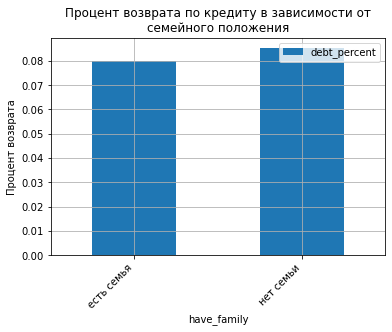

In [119]:
query = """
select
have_family,
avg(t.debt) as debt_percent,
count(t.debt) as how_many_people
from data_credit t
group by have_family"""
t = select(query)
display(t)
print('Разница по проценту задолженности между категориями: {:.2%}'.format(t.debt_percent.max() - t.debt_percent.min()))
t.plot(kind='bar', x='have_family', y='debt_percent', grid=True, rot=45)
plt.title('Процент возврата по кредиту в зависимости от\nсемейного положения')
plt.xticks(ha='right')
plt.ylabel('Процент возврата')
plt.show()

#### Вывод

Разница ещё меньше, менее 1%, и опять же несопоставима с более чем 90% возвратами. Зависимость незначительна.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?<a id='step3.3'></a>

Исключим оставленные в таблице **неверные** данные из выборки, а далее по аналогии.

,income_level,debt_percent,how_many_people
0,2. низкий,0.079846,4421
1,3. средний,0.088269,6922
2,4. выше среднего,0.083645,4818
3,5. высокий,0.070442,5068


Разница по проценту задолженности между категориями: 1.78%


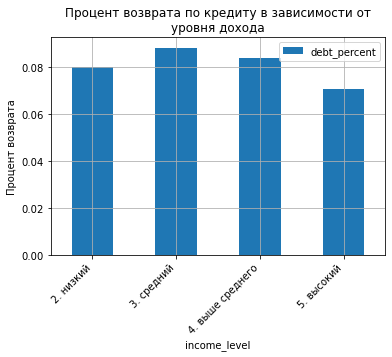

In [120]:
t = select('''
select
t.income_level,
avg(t.debt) as debt_percent,
count(t.debt) as how_many_people
from data_credit t
where income_level is not NULL
group by income_level
''')
display(t)
print('Разница по проценту задолженности между категориями: {:.2%}'.format(t.debt_percent.max() - t.debt_percent.min()))
t.plot(kind='bar', x='income_level', y='debt_percent', grid=True, rot=45)
plt.title('Процент возврата по кредиту в зависимости от\nуровня дохода')
plt.xticks(ha='right')
plt.ylabel('Процент возврата')
plt.show()

#### Вывод

Высокий уровень дохода предсказуемо показал большую вероятность возврата кредита в срок, однако *средний* доход и *выше среднего* показали бОльшой процент задержек по возврату, нежели *низкий*, так что об однозначной зависимости сказать нельзя.

Различия в вероятности возврата кредита менее чем в 2% несопоставимо малы по сравнению с более чем 90% возврата у всех категорий, так что ей можно пренебречь. Однако если для бизнеса эта разница существенна, требуется дополнительная статистическая оценка.

#### Как разные цели кредита влияют на его возврат в срок?<a id='step3.4'></a>

,purpose_category,debt_percent,how_many_people
0,1. недвижимость,0.072596,10703
1,2. автомобиль,0.093236,4258
2,3. свадьба,0.078730,2299
3,4. образование,0.092947,3970


Разница по проценту задолженности между категориями: 2.06%


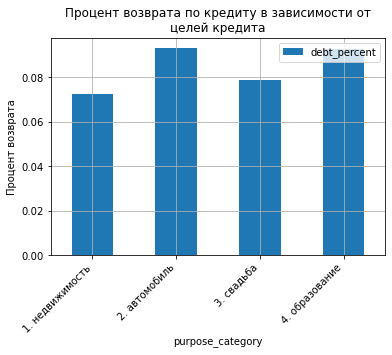

In [121]:
t = select('''
select
purpose_category,
avg(debt) as debt_percent,
count(debt) as how_many_people
from data_credit t
group by t.purpose_category''')
display(t)
print('Разница по проценту задолженности между категориями: {:.2%}'.format(t.debt_percent.max() - t.debt_percent.min()))
t.plot(kind='bar', x='purpose_category', y='debt_percent', grid=True, rot=45)
plt.title('Процент возврата по кредиту в зависимости от\nцелей кредита')
plt.xticks(ha='right')
plt.ylabel('Процент возврата')
plt.show()

#### Вывод

2% разницы несопоставимо малы по сравнению с 90% возврата, так что ей можно пренебречь, как и в предыдущих случаях. Если для бизнеса эта разница существенна, требуется дополнительная статистическая оценка.

### Шаг 4. Общий вывод<a id='step4'></a>

##### Выводы
При проверках возврата кредита в срок контролировалось достаточное количество людей в каждой категории, позволяющее повысить точность оценки, и для удобства данные переводились в проценты с перепроверкой соотношений.

Все проверки показали, что разница в 2% или менее (меньше всего проявились различия в зависимости от наличия/отсутствия семьи) между проверяемыми категориями несопоставимо мала по сравнению с более 90% возвратов кредита в срок, поэтому какие-либо выводы исходя из текущих данных и исследований делать преждевременно. Если для бизнеса **значительна эта разница**, нужно проводить более глубокую статистическую (*разброс значений*, оценка *погрешности* и т.п.) оценка для определения достоверности результатов.

Особенно информативной она будет для оценки *случайности противоречивости* результатов для 4 категорий по *уровню дохода*. Может быть, разброс значений, а следовательно, и *погрешность* измерений оказались чуть больше 2% разброса по среднему в данном случае, а следовательно, зависимость есть?

Поэтому *без более глубокой статистической оценки* (величина разброса и т.п.) или анализа нескольких выборок, нельзя утверждать, будет ли эта тенденция повторяться от выборки к выборке или совершенно случайна.